# Result Analysis: Estimation Analysis

The goal here is to understand if the Datamodels were capable to capture the relation in the training data and how it's working

In [1]:

import pandas as pd
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.utils import plot_individual_weights_heatmap
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/caio.rhoden/miniconda3/envs/datamodels/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_train = pd.read_csv("../../../data/bbh/datamodels/reduced_sample/train_set.csv")
df_test = pd.read_csv("../../../data/bbh/datamodels/reduced_sample/test_set.csv")
weights = torch.load("../../../data/bbh/datamodels/reduced_sample/estimations/weights.pt")
bias = torch.load("../../../data/bbh/datamodels/reduced_sample/estimations/bias.pt")

/tmp/ipykernel_756954/1085244540.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load("../../../data/bbh/datamodels/reduced_sample/estimations/weights.pt

In [11]:
df_train

,task,input,output
0,disambiguation_qa,"In the following sentences, explain the antece...",(A)
1,disambiguation_qa,"In the following sentences, explain the antece...",(B)
2,disambiguation_qa,"In the following sentences, explain the antece...",(C)
3,disambiguation_qa,"In the following sentences, explain the antece...",(B)
4,disambiguation_qa,"In the following sentences, explain the antece...",(B)
...,...,...,...
155,word_sorting,Sort the following words alphabetically: List:...,alkali breach buckle falsetto hyperboloid liqu...
156,word_sorting,Sort the following words alphabetically: List:...,amphibious assist baseplate benchmark ell hatc...
157,word_sorting,Sort the following words alphabetically: List:...,abbe adposition arragon cast danbury emplace f...
158,word_sorting,Sort the following words alphabetically: List:...,avalanche cameroon canal chaplin clonic coachm...


In [4]:
weights = weights.cpu().detach().numpy()
bias = bias.cpu().detach().numpy()

## Part 1: Is the Datamodel working?

The goal here is to understand if the trained datamodels are achieving the retrieval and interpretability expectation
</br>
To do so, we will look for three different things:
- Is it performing in the test collections?
- Is it able to distinguish the tasks in the training pool and correlate them to the test set?
- Is increasing the performance when comparing to the baseline?

### 1.1 - Is it performing in the test collections? 

Here we will get the performance of the datamodel for the test collections

### 1.2 - Is it able to distinguish the tasks in the training pool and correlate them to the test set?

Here we will work with a possibility to individual analysis over the results, to see where are the most impactful weights for a given test sample it's possible here to:
- see a heatmap of estimations on the training pool across all tasks
- see the i-th more influential samples

Globalt, we can measure the ability to discern between tasks by analysing:
- the median quantity of samples in the first quarter of most influential samples
- the difference between the means of task weights and the others

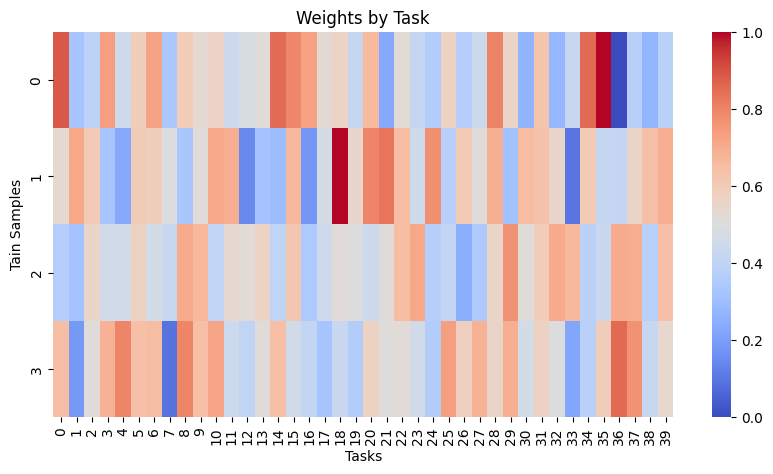

In [20]:
## Set idx
idx = 8
plot_individual_weights_heatmap(weights[idx], 4)